# 1. 모델 학습 기술

<img src="./imgs/model.png" width="700" height="250"/>

## 1) 학습 단위

<img src="./imgs/batch.png" width = "500" hight = "300" >

- 전반적인 통계기법에서는 모든 데이터를 한번에 알고리즘에 넣고 분석하는 전체 배치(Full Batch) 방식을 사용
- 전체 데이터 중 랜덤으로 추출하여 알고리즘에 넣는 Stochastic 방식
- 전체 데이터 중 일부씩 모델에 사용하는 미니배치(Mini Batch)방식을 사용
- Mini Batch 사용 이유 : 전체 데이터를 한번에 넣기 힘듬 & 한번에 불러와서 학습시키면 리소스 낭비
- 한번 학습할 때 얼마만큼의 미니배치 크기를 사용할지 결정해야함
- 배치 크기가 작을수록 학습 시간이 많이 소요되고, 클수록 학습 시간이 적게 소요

## 2) 데이터 스케일링

- 데이터의 스케일이 다를 경우 딥러닝 모델 학습시에 제대로 동작하지 않을 수 있음
- 모든 특성의 범위(또는 분포)를 같도록 해주는 것이 좋음
- **표준화(Standardization)** : 주로 사용되는 스케일링으로 특성들의 평균을 0, 분산을 1로 스케일링 하는 방법
- 특성들을 정규분포로 만드는 과정
- **정규화(Normalization)** : 특성들을 특정 범위로 스케일링하는 방법으로 주로 가장 작은 값은 0, 가장 큰 값은 1로 변환
- 모든 특성들이 0 ~ 1 범위를 갖도록 함

## 3) 학습률과 에폭

- 모델의 학습정도가 학습률에 따라 달라지므로 적절한 학습률을 찾는 것이 핵심
- 가중치의 조정 단위라고 할 수 있고, 오차가 최소화되도록 얼마만큼의 간격으로 변경할 것인가를 정하는 문제
- 학습률이 너무 크면 최소값을 오버슈트되거나 반대로 너무 작으면 최소값에 이르기도 전에 학습이 멈춰버릴 수 있음
- 에폭은 한번의 학습과정을 몇 번 수행할지 지정하는 것으로 학습 횟수를 너무 작게, 또는 너무 크게 지정하면 과소적합 또는 과대적합이 발생 할 수 있음
- 여러번 진행하면서 최적의 학습횟수를 찾아야함
- 학습률과 에폭간의 관계는 학습률이 적을 수록 에폭이 커야 하고, 배치크기도 관련이 있으여 다만 학습속도와 연산이 지속적으로 반복되기 때문에 cost/loss의 변화를 봐야함

## 4) 은닉층과 뉴런수

- 모델을 구성할 때 은닉층을 어케 구성하고 얼마나 쌓을지 그리고 뉴런의 슈를 얼마나 많이 구성할지에 따라서 모델의 크기가 달라지고 그에 따라서 학습과 최적화 정도에 차이가 발생

## 5) 활성화 함수

- 딥러능 성능에 주요 오소 중 하나로 가중치(weight)와 바이어스(bias)를 조정
- 어떤 활성화 함수를 사용하는지에 따라서 모델이 얼마나 잘 학습되는지에 영향을 미침
- 활성화 함수는 크게 선형인 시그모이드(sigmoid)계열과 비선형인 ReLU계열로 구분
- 시그모이드 계열은 결과값이 [0,1], 혹은 [-1,1] 사이의 값이 나오며 렐루 계열은 예외를 제외하면 0을 중심으로 양수는 양수 그대로를, 음수는 0이나 0에 가까운 수를 내놓음

## 6) 가중치 초기화

- 초기에 가중치의 값을 어떻게 하는지도 모델학습에 중요한 부분
- 만약 초기값을 0으로 할 경우 모든 노드들의 값이 같아서 여러 노드들을 사용하는 의미가 없어지므로 동일한 값을 가지지 않도록 무작위로 설정해야함
- 가중치 초기화를 확률분포를 사용하여 정규분포를 가지도록 하면 가중치의 값이 일부 값으로 치우치게 되고, 그러면 활성화 함수를 통과한 값이 치우치게 되고, 표현할 수 있느 신경망의 수가 적어지게 되는 문제가 있음
- 가중치 초기화는 활성화값이 골고루 분포되는것이 중요
- 적절하게 가중치를 초기화하는 방법으로 Xavier & Bengio, He등이 간단하게 설정하는 방법을 제안

## 7) 옵티마이저

- SGD: 확률적경사하강법은 최소점을 찾는 과정에서 멈추거나 매우 속도가 느리지만, 모멘텀과 네스테로프 모멘텀, 그리고 학습률 감소 기법을 지원
- RMSprop: 가장 최근의 gradient만 반영하여 전력 최적점을 수렴하는 방법으로 지수적 감소를 사용하여 구현
- Adagrad: gradient 벡터값을 스케일링하여 단위로 인한 경사하강의 오류를 수정하는 방법으로 변화하는 기울기 전체의 내역을 고려
- Adadelta: Adagrad는 너무 빨리 기울기를 0으로 만들어버려서 그래디언트 업데이트의 이동창(moving window)에 기반하여 학습률을 조절
- Adam: ADAptive Moment Estimater의 줄임말로 모멘텀 최적화와 RMSProp을 병합한 방법

# 2. 과소적합과 과대적합

## 1) 과소적합

- 학습데이터를 충분히 학습하지 않아 성능이 매우 안좋은 경우
- 모델이 지나치게 단순한 경우에 발생하며, 해결하기 위해서는 학습데이터를 충분히 수집하거나 보다 더 복잡한 모델을 사용해야 함
- Epochs수를 늘려 충분히 학습할 수 있도록 해야함

## 2) 과대적합

- 모델이 학습 데이터에 지나치게 맞추어진 상태
- 새로운 데이터에서는 모델의 성능 저하가 발생하는 경우이며, 주로 학습데이터가 매우 적거나 모델이 지나치게 복잡한 경우, 그리고 학습 회숫가 매우 많을 경우 발생
- 과대적합을 해결하기 위해서는 다양한 학습 데이터를 수집 및 학습하거나, 파라미터가 적은 모델을 선택하거나 학습 데이터의 늑성 수를 줄이는 등 모델을 단순화할 필요가 있음

## 3) 과대적합과 과소적합 방지방법

- 파라미터가 적은 모델을 선택, 학습데이터의 특성 데이터를 줄이는 등/ 에폭수를 적절히 조절하거나 적절한 크기의 모델을 선택, 혹은 충분한 데이터를 수집하는 방법

# 3. IMDB 딥러닝 모델 예제

## 1) 데이터 로드 및 전처리

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0])
print(train_labels[0])

17464789/17464789 [==============================] - 3s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

In [2]:
word_index = imdb.get_word_index()
word_index

1641221/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [3]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
index_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [4]:
# 1 순위의 출현 빈도를 기록한 단어를 출력합니다.
# 키 값의 숫자를 바꿔가며 다른 순위의 단어들도 확인해볼 수 있어요!
index_word[1]

'the'

In [5]:
word_25th = index_word[24]
print(word_25th)


his


In [6]:
review = ' '.join([str(i) for i in train_data[0]])
review

'1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 2 9 35 480 284 5 150 4 172 112 167 2 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 2 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 2 8 4 107 117 5952 15 256 4 2 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 2 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32'

In [7]:
review = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
def one_hot_encoding(data, dim=10000): # imdb 데이터의 num_words를 10000으로 설정해서 dim도 10000으로 맞춰줍니다.
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [9]:
print(train_labels[0])
print(test_labels[0])

1
0


In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train[0])
print(y_test[0])

1.0
0.0


## 2) 모델 구성

In [11]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(16, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

2023-07-25 19:02:16.192582: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                160016    
                                                                 
 hidden (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## 3) 모델 컴파일 및 학습

In [13]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 78ms/step - loss: 0.4782 - accuracy: 0.8158 - val_loss: 0.3557 - val_accuracy: 0.8798
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2730 - accuracy: 0.9074 - val_loss: 0.3021 - val_accuracy: 0.8794
Epoch 3/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2098 - accuracy: 0.9260 - val_loss: 0.2846 - val_accuracy: 0.8860
Epoch 4/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1722 - accuracy: 0.9393 - val_loss: 0.2966 - val_accuracy: 0.8805
Epoch 5/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1466 - accuracy: 0.9492 - val_loss: 0.3070 - val_accuracy: 0.8804
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1289 - accuracy: 0.9569 - val_loss: 0.3273 - val_accuracy: 0.8780
Epoch 7/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1111 - accuracy: 0.9620 - val_loss: 0.3519 - val_accuracy: 0.8738
Epoch 8/20
49

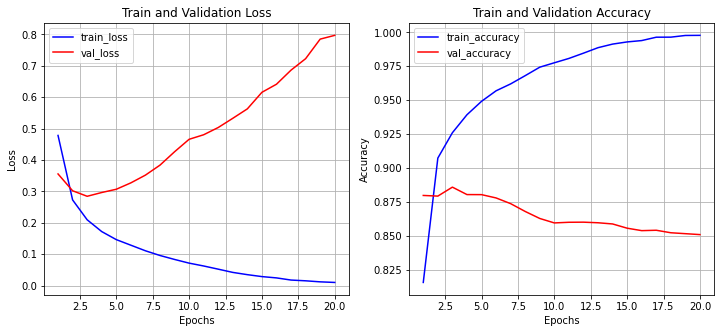

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()